<a href="https://colab.research.google.com/github/zera888/Image_process/blob/MachineLearning-100days/2021_10_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql

In [ ]:
import pymysql
link=pymysql.connect(
  host="6.tcp.ngrok.io",
  user="root", #帳號大家寫自己的
  passwd="",
  db="test", #資料庫名稱大家寫自己的
  charset="utf8",
  port=15782
)

cur=link.cursor()

cur.execute("SELECT * FROM `xxx`")
r=cur.fetchall()
print(r)


link.close()


In [ ]:
import pymysql
link=pymysql.connect(
  host="teaching-db.bo-yuan.net",
  user="AI09_00", #帳號大家寫自己的
  passwd="123",
  db="AI09_00", #資料庫名稱大家寫自己的
  charset="utf8",
  port=3306
)
cur=link.cursor()
# id=input("要修改的資料ID：")
title=input("標題：")
description=input("描述：")
source=input("來源：")
# create_date=input("日期：")

# cur.execute("UPDATE `news` SET `title`=%s,`description`=%s WHERE `id`=%s",[title,description,id])
# link.commit()

cur.execute(
  "INSERT INTO `news`(`title`,`description`,`source`,`create_date`) VALUES(%s,%s,%s,'2021-10-14')",
  [title,description,source]
)
link.commit()

link.close()

In [ ]:
import pymysql
link=pymysql.connect(
  host="teaching-db.bo-yuan.net",
  user="AI09_00", #帳號大家寫自己的
  passwd="123",
  db="AI09_00", #資料庫名稱大家寫自己的
  charset="utf8",
  port=3306
)
cur=link.cursor()

cur.execute(
  "INSERT INTO `news`(`title`,`description`,`source`,`create_date`) VALUES(%(y)s,%(z)s,%(x)s,'2021-10-14')",
  {
    "x":input("來源："),
    "y":input("標題："),
    "z":input("描述：")
  }
)
link.commit()
print(cur.lastrowid)

link.close()

In [ ]:
import pymysql
link=pymysql.connect(
  host="teaching-db.bo-yuan.net",
  user="AI09_00", #帳號大家寫自己的
  passwd="123",
  db="AI09_00", #資料庫名稱大家寫自己的
  charset="utf8",
  port=3306
)
cur=link.cursor()

# cur.execute("SELECT * FROM `news` LIMIT 2,1")
cur.execute("SELECT * FROM `news`")
d=cur.fetchone() #抓第一筆
print(d[0],d[1],d[2])

d=cur.fetchone() #抓第二筆
print(d[0],d[1],d[2])

#抓完剩下的
for a in cur.fetchall():
  print(a[0],a[1],a[2])

# d=cur.fetchone() #fetchone不可以放在fetchall後面執行
# print(d[0],d[1],d[2])

link.close()

In [ ]:
import requests,codecs
from bs4 import BeautifulSoup
import pymysql
link=pymysql.connect(
  host="teaching-db.bo-yuan.net",
  user="AI09_00", #帳號大家寫自己的
  passwd="123",
  db="AI09_00", #資料庫名稱大家寫自己的
  charset="utf8",
  port=3306
)
cur=link.cursor()

r1=requests.get(
  "https://money.udn.com/rank/newest/1001/0/1",
  headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0",
    "Cookie":"_fbp=fb.1.1633663623210.1882775856; _ga=GA1.2.1771640070.1633663623; __gads=ID=65d8959fc2d390af:T=1633663623:S=ALNI_MbC1UGBL22RONgv6cdY-GYys6viwQ; cto_bundle=-kdyol9YckVHNDlNeSUyRnlVb2ZPa2g3dmJwNktLTGUlMkZrTiUyRlRUVjlQQVhFV3lMeCUyRiUyRnklMkZsODJiVG4lMkY1alBEa0t0UFV5allYSmwlMkZVQ01NaVZTRDhSMU5RajNNbmp1NXBXUGtCJTJGejA4aUhxYnRsTmhNYmJyUzhUeVlFQ250V0pGc0wyJTJGaGsw; __asc=1b577b2717c7736b87ed750edca; __auc=1b577b2717c7736b87ed750edca; meter_1=1; meter_7=1; _gid=GA1.2.1808153399.1634087648; _gat_UA-19210365-3=1; _gat_UA-19660006-1=1; gliaplayer_ssid=ded47c80-2bc2-11ec-9e7e-cbdcd7321766; _gliaplayer_user_info={%22city%22:%22suginami%20city%22%2C%22uid%22:%22defdfd80-2bc2-11ec-9e7e-cbdcd7321766%22%2C%22country%22:%22TW%22%2C%22region%22:%2213%22%2C%22source%22:%22CF%22%2C%22latlong%22:%2235.699470%2C139.635520%22%2C%22ip%22:%22111.243.51.55%22}; _pbjs_userid_consent_data=3524755945110770"
  }
)
b1=BeautifulSoup(r1.text,"html.parser")
for b2 in b1.find_all("tr",{"style":"table-row"}):
  print(
    b2.find("td",{"align":"right"}).text,
    b2.find("a").attrs["href"],
    b2.find("a").text
  )
  r2=requests.get(
    b2.find("a").attrs["href"],
    headers={
      "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0",
      "Cookie":"_fbp=fb.1.1633663623210.1882775856; _ga=GA1.2.1771640070.1633663623; __gads=ID=65d8959fc2d390af:T=1633663623:S=ALNI_MbC1UGBL22RONgv6cdY-GYys6viwQ; cto_bundle=-kdyol9YckVHNDlNeSUyRnlVb2ZPa2g3dmJwNktLTGUlMkZrTiUyRlRUVjlQQVhFV3lMeCUyRiUyRnklMkZsODJiVG4lMkY1alBEa0t0UFV5allYSmwlMkZVQ01NaVZTRDhSMU5RajNNbmp1NXBXUGtCJTJGejA4aUhxYnRsTmhNYmJyUzhUeVlFQ250V0pGc0wyJTJGaGsw; __asc=1b577b2717c7736b87ed750edca; __auc=1b577b2717c7736b87ed750edca; meter_1=1; meter_7=1; _gid=GA1.2.1808153399.1634087648; _gat_UA-19210365-3=1; _gat_UA-19660006-1=1; gliaplayer_ssid=ded47c80-2bc2-11ec-9e7e-cbdcd7321766; _gliaplayer_user_info={%22city%22:%22suginami%20city%22%2C%22uid%22:%22defdfd80-2bc2-11ec-9e7e-cbdcd7321766%22%2C%22country%22:%22TW%22%2C%22region%22:%2213%22%2C%22source%22:%22CF%22%2C%22latlong%22:%2235.699470%2C139.635520%22%2C%22ip%22:%22111.243.51.55%22}; _pbjs_userid_consent_data=3524755945110770"
    }
  )
  b3=BeautifulSoup(r2.text,"html.parser")
  description=""
  for b4 in b3.find("div",{"id":"article_body"}).find_all("p"):
    description+=b4.text
  cur.execute(
    "INSERT INTO `news`(`title`,`description`,`source`) VALUES(%(y)s,%(z)s,'聯合新聞網')",
    {
      "y":b2.find("a").text,
      "z":description
    }
  )
  link.commit()
  
  
link.close()


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1=cv2.imread("1.jpg", 1)
# m1=cv2.cvtColor(m1, cv2.COLOR_BGR2HSV)
m1=cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)
m1=cv2.cvtColor(m1, cv2.COLOR_GRAY2BGR)
cv2.imwrite("1-1.jpg", m1, [cv2.IMWRITE_JPEG_QUALITY, 100])

cv2_imshow(m1)
# cv2.imshow("Windows 1",m1) #離線版

print(m1.shape)
# print(m1[0])

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1=np.full((300, 500, 3), (200,200,255), np.uint8)
cv2_imshow(m1)

m1=np.full((300, 500), 127, np.uint8)
cv2_imshow(m1)

In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1=cv2.imread("2.png", -1)
print(m1.shape)
cv2_imshow(m1)


In [ ]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

m1=np.full((300, 500, 3), (255,255,255), np.uint8)
cv2.line(m1, (20,20), (20,200), (0,0,255), 2)

cv2.rectangle(m1, (40,40), (150,150), (0,255,0), 2)
cv2.rectangle(m1, (200,40), (300,150), (0,255,0), -1)

cv2.circle(m1, (100,230), 30, (255,0,0), 2)
cv2.circle(m1, (200,230), 30, (255,0,0), -1)

cv2_imshow(m1)

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow

# m1=np.full((300, 500, 3), (255,255,255), np.uint8)
m1=cv2.imread("1.jpg", 1)

m1=Image.fromarray(m1)
ImageDraw.Draw(m1).text((30,30), "AI班", (0,0,255), ImageFont.truetype("kaiu.ttf",50))
m1=np.array(m1)

cv2_imshow(m1)

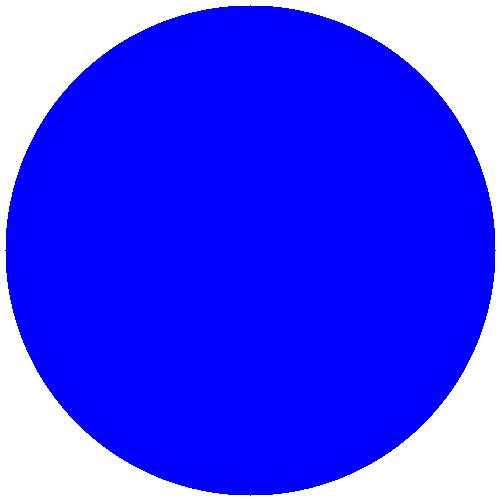

In [ ]:
from PIL import ImageFont, ImageDraw, Image
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import time

m1=np.full((500, 500, 3), (255,255,255), np.uint8)
for w in range(5,250,15):
  dp.clear_output(True)
  cv2.circle(m1, (250,250), w, (255,0,0), -1)
  cv2_imshow(m1)
  time.sleep(0.3)